# New York City Zip Code Demographic Data

In [283]:
#data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#webscraping libraries
from bs4 import BeautifulSoup
import requests

The dataset gives survey results of demographic info of NYC by zip code. Attributes include ethnicity, gender, citizenship status, and public benefit status. It doesn't seem to be a true survey since many zip codes are not represented, nut it is from data.gov so it should be real data. 

In [72]:
#Not a true survey it seems
data = pd.read_csv("Demographic_Statistics_By_Zip_Code.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 46 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   JURISDICTION NAME                    236 non-null    int64  
 1   COUNT PARTICIPANTS                   236 non-null    int64  
 2   COUNT FEMALE                         236 non-null    int64  
 3   PERCENT FEMALE                       236 non-null    float64
 4   COUNT MALE                           236 non-null    int64  
 5   PERCENT MALE                         236 non-null    float64
 6   COUNT GENDER UNKNOWN                 236 non-null    int64  
 7   PERCENT GENDER UNKNOWN               236 non-null    int64  
 8   COUNT GENDER TOTAL                   236 non-null    int64  
 9   PERCENT GENDER TOTAL                 236 non-null    int64  
 10  COUNT PACIFIC ISLANDER               236 non-null    int64  
 11  PERCENT PACIFIC ISLANDER        

The zip code is represented by the JURISDICTION NAME column. We change it to a string since it is not mean to be a numeric value.

In [73]:
#We want jurisdiction name to be a string
data["JURISDICTION NAME"] = data["JURISDICTION NAME"].astype(str)


In [74]:
data.columns

Index(['JURISDICTION NAME', 'COUNT PARTICIPANTS', 'COUNT FEMALE',
       'PERCENT FEMALE', 'COUNT MALE', 'PERCENT MALE', 'COUNT GENDER UNKNOWN',
       'PERCENT GENDER UNKNOWN', 'COUNT GENDER TOTAL', 'PERCENT GENDER TOTAL',
       'COUNT PACIFIC ISLANDER', 'PERCENT PACIFIC ISLANDER',
       'COUNT HISPANIC LATINO', 'PERCENT HISPANIC LATINO',
       'COUNT AMERICAN INDIAN', 'PERCENT AMERICAN INDIAN',
       'COUNT ASIAN NON HISPANIC', 'PERCENT ASIAN NON HISPANIC',
       'COUNT WHITE NON HISPANIC', 'PERCENT WHITE NON HISPANIC',
       'COUNT BLACK NON HISPANIC', 'PERCENT BLACK NON HISPANIC',
       'COUNT OTHER ETHNICITY', 'PERCENT OTHER ETHNICITY',
       'COUNT ETHNICITY UNKNOWN', 'PERCENT ETHNICITY UNKNOWN',
       'COUNT ETHNICITY TOTAL', 'PERCENT ETHNICITY TOTAL',
       'COUNT PERMANENT RESIDENT ALIEN', 'PERCENT PERMANENT RESIDENT ALIEN',
       'COUNT US CITIZEN', 'PERCENT US CITIZEN', 'COUNT OTHER CITIZEN STATUS',
       'PERCENT OTHER CITIZEN STATUS', 'COUNT CITIZEN STATUS UNKN

There are a lot of columns to this dataset. I want to start out with gender and ethnicity data, since it will be the most straightforward to work with, and because I fell lke there is more variability across att the areas.

In [75]:
#drop all columns that have to do with citizenship and public assitance, so we can focus on only one factor
data.drop(columns=['COUNT PERMANENT RESIDENT ALIEN', 'PERCENT PERMANENT RESIDENT ALIEN',
       'COUNT US CITIZEN', 'PERCENT US CITIZEN', 'COUNT OTHER CITIZEN STATUS',
       'PERCENT OTHER CITIZEN STATUS', 'COUNT CITIZEN STATUS UNKNOWN',
       'PERCENT CITIZEN STATUS UNKNOWN', 'COUNT CITIZEN STATUS TOTAL',
       'PERCENT CITIZEN STATUS TOTAL', 'COUNT RECEIVES PUBLIC ASSISTANCE',
       'PERCENT RECEIVES PUBLIC ASSISTANCE',
       'COUNT NRECEIVES PUBLIC ASSISTANCE',
       'PERCENT NRECEIVES PUBLIC ASSISTANCE',
       'COUNT PUBLIC ASSISTANCE UNKNOWN', 'PERCENT PUBLIC ASSISTANCE UNKNOWN',
       'COUNT PUBLIC ASSISTANCE TOTAL', 'PERCENT PUBLIC ASSISTANCE TOTAL'], inplace=True)

In [77]:
#THere were no participants where gender was unknown so we drop that
data.drop(columns=['COUNT GENDER UNKNOWN', 'PERCENT GENDER UNKNOWN', ], inplace=True)

18 of the zip codes were not in NYC so I dropped them since they cannot be classified into boroughs.

In [99]:
#There are 18 zip codes that are not in NYC, so we can't classify them into a borough later, so we drop them
row_drop_list = ["11510", "12423", "12428", "12435", "12466", "12528", "12701", "12733", "12734", "12737", 
                "12750", "12754", "12758", "12764", "12768", "12779", "12783", "12788", "12789", "13731", ]
for zip in row_drop_list:
    data.drop(data.loc[data["JURISDICTION NAME"] == zip].index, inplace=True)
data.reset_index(drop=True)

,JURISDICTION NAME,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE,COUNT MALE,PERCENT MALE,COUNT GENDER TOTAL,PERCENT GENDER TOTAL,COUNT PACIFIC ISLANDER,PERCENT PACIFIC ISLANDER,...,COUNT WHITE NON HISPANIC,PERCENT WHITE NON HISPANIC,COUNT BLACK NON HISPANIC,PERCENT BLACK NON HISPANIC,COUNT OTHER ETHNICITY,PERCENT OTHER ETHNICITY,COUNT ETHNICITY UNKNOWN,PERCENT ETHNICITY UNKNOWN,COUNT ETHNICITY TOTAL,PERCENT ETHNICITY TOTAL
0,10001,44,22,0.50,22,0.50,44,100,0,0.0,...,1,0.02,21,0.48,3,0.07,0,0.0,44,100
1,10002,35,19,0.54,16,0.46,35,100,0,0.0,...,6,0.17,0,0.00,0,0.00,0,0.0,35,100
2,10003,1,1,1.00,0,0.00,1,100,0,0.0,...,0,0.00,0,0.00,0,0.00,0,0.0,1,100
3,10005,2,2,1.00,0,0.00,2,100,0,0.0,...,0,0.00,1,0.50,0,0.00,0,0.0,2,100
4,10006,6,2,0.33,4,0.67,6,100,0,0.0,...,1,0.17,3,0.50,0,0.00,0,0.0,6,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,11798,5,3,0.60,2,0.40,5,100,0,0.0,...,0,0.00,5,1.00,0,0.00,0,0.0,5,100
81,12751,7,2,0.29,5,0.71,7,100,0,0.0,...,7,1.00,0,0.00,0,0.00,0,0.0,7,100
82,12759,11,0,0.00,11,1.00,11,100,0,0.0,...,11,1.00,0,0.00,0,0.00,0,0.0,11,100
83,12763,11,11,1.00,0,0.00,11,100,0,0.0,...,11,1.00,0,0.00,0,0.00,0,0.0,11,100


In [ ]:
data.describe()

There are some zip codes listed where no one was surveyed, so I dropped them.

In [101]:
data.drop(data.loc[data["COUNT PARTICIPANTS"] == 0].index, inplace=True)
data.reset_index(drop=True)

,JURISDICTION NAME,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE,COUNT MALE,PERCENT MALE,COUNT GENDER TOTAL,PERCENT GENDER TOTAL,COUNT PACIFIC ISLANDER,PERCENT PACIFIC ISLANDER,...,COUNT WHITE NON HISPANIC,PERCENT WHITE NON HISPANIC,COUNT BLACK NON HISPANIC,PERCENT BLACK NON HISPANIC,COUNT OTHER ETHNICITY,PERCENT OTHER ETHNICITY,COUNT ETHNICITY UNKNOWN,PERCENT ETHNICITY UNKNOWN,COUNT ETHNICITY TOTAL,PERCENT ETHNICITY TOTAL
0,10001,44,22,0.50,22,0.50,44,100,0,0.0,...,1,0.02,21,0.48,3,0.07,0,0.0,44,100
1,10002,35,19,0.54,16,0.46,35,100,0,0.0,...,6,0.17,0,0.00,0,0.00,0,0.0,35,100
2,10003,1,1,1.00,0,0.00,1,100,0,0.0,...,0,0.00,0,0.00,0,0.00,0,0.0,1,100
3,10005,2,2,1.00,0,0.00,2,100,0,0.0,...,0,0.00,1,0.50,0,0.00,0,0.0,2,100
4,10006,6,2,0.33,4,0.67,6,100,0,0.0,...,1,0.17,3,0.50,0,0.00,0,0.0,6,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,11798,5,3,0.60,2,0.40,5,100,0,0.0,...,0,0.00,5,1.00,0,0.00,0,0.0,5,100
81,12751,7,2,0.29,5,0.71,7,100,0,0.0,...,7,1.00,0,0.00,0,0.00,0,0.0,7,100
82,12759,11,0,0.00,11,1.00,11,100,0,0.0,...,11,1.00,0,0.00,0,0.00,0,0.0,11,100
83,12763,11,11,1.00,0,0.00,11,100,0,0.0,...,11,1.00,0,0.00,0,0.00,0,0.0,11,100


In [102]:
data.describe()

,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE,COUNT MALE,PERCENT MALE,COUNT GENDER TOTAL,PERCENT GENDER TOTAL,COUNT PACIFIC ISLANDER,PERCENT PACIFIC ISLANDER,COUNT HISPANIC LATINO,...,COUNT WHITE NON HISPANIC,PERCENT WHITE NON HISPANIC,COUNT BLACK NON HISPANIC,PERCENT BLACK NON HISPANIC,COUNT OTHER ETHNICITY,PERCENT OTHER ETHNICITY,COUNT ETHNICITY UNKNOWN,PERCENT ETHNICITY UNKNOWN,COUNT ETHNICITY TOTAL,PERCENT ETHNICITY TOTAL
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.0,85.000000,85.000000,85.000000,...,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,26.611765,16.729412,0.562353,9.882353,0.437882,26.611765,100.0,0.023529,0.000471,5.070588,...,12.400000,0.272588,6.176471,0.288588,1.294118,0.050941,0.164706,0.009412,26.611765,99.929412
std,41.206245,31.582993,0.277260,12.619346,0.277635,41.206245,0.0,0.152477,0.003050,9.166175,...,35.674521,0.392796,11.099310,0.291516,2.496777,0.094625,0.614256,0.041212,41.206245,0.257656
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,100.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,99.000000
25%,4.000000,2.000000,0.440000,1.000000,0.290000,4.000000,100.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,100.000000
50%,11.000000,6.000000,0.570000,4.000000,0.430000,11.000000,100.0,0.000000,0.000000,1.000000,...,1.000000,0.010000,2.000000,0.280000,0.000000,0.000000,0.000000,0.000000,11.000000,100.000000
75%,36.000000,17.000000,0.710000,14.000000,0.560000,36.000000,100.0,0.000000,0.000000,6.000000,...,4.000000,0.720000,7.000000,0.500000,1.000000,0.070000,0.000000,0.000000,36.000000,100.000000
max,248.000000,194.000000,1.000000,56.000000,1.000000,248.000000,100.0,1.000000,0.020000,51.000000,...,216.000000,1.000000,60.000000,1.000000,17.000000,0.500000,5.000000,0.250000,248.000000,100.000000


Of the zip code areas remaining, about half of them have less than 11 participants for the survey, which is not very much, so I'll drop the lower half of the data.

In [103]:
#Want to drop zipcodes where number participants was under 17, so we will only consider the top 50% of surveyed areas
data_reduced = data[data["COUNT PARTICIPANTS"] > 11]

In [104]:
data_reduced.describe()

,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE,COUNT MALE,PERCENT MALE,COUNT GENDER TOTAL,PERCENT GENDER TOTAL,COUNT PACIFIC ISLANDER,PERCENT PACIFIC ISLANDER,COUNT HISPANIC LATINO,...,COUNT WHITE NON HISPANIC,PERCENT WHITE NON HISPANIC,COUNT BLACK NON HISPANIC,PERCENT BLACK NON HISPANIC,COUNT OTHER ETHNICITY,PERCENT OTHER ETHNICITY,COUNT ETHNICITY UNKNOWN,PERCENT ETHNICITY UNKNOWN,COUNT ETHNICITY TOTAL,PERCENT ETHNICITY TOTAL
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000
mean,50.975000,32.400000,0.582250,18.575000,0.417750,50.975000,100.0,0.050000,0.001000,9.750000,...,24.600000,0.331750,11.525000,0.301250,2.475000,0.045000,0.27500,0.004000,50.975000,99.950000
std,49.948942,40.809627,0.174363,13.819139,0.174363,49.948942,0.0,0.220721,0.004414,11.678931,...,49.419087,0.411133,14.343742,0.258984,3.234331,0.039678,0.84694,0.011277,49.948942,0.220721
min,13.000000,3.000000,0.230000,0.000000,0.000000,13.000000,100.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,13.000000,99.000000
25%,19.500000,12.000000,0.477500,7.750000,0.305000,19.500000,100.0,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.750000,0.025000,0.000000,0.000000,0.00000,0.000000,19.500000,100.000000
50%,37.000000,18.000000,0.565000,17.500000,0.435000,37.000000,100.0,0.000000,0.000000,7.000000,...,2.000000,0.045000,8.000000,0.310000,1.500000,0.050000,0.00000,0.000000,37.000000,100.000000
75%,53.750000,32.250000,0.695000,26.000000,0.522500,53.750000,100.0,0.000000,0.000000,14.000000,...,33.750000,0.825000,15.000000,0.492500,3.000000,0.070000,0.00000,0.000000,53.750000,100.000000
max,248.000000,194.000000,1.000000,56.000000,0.770000,248.000000,100.0,1.000000,0.020000,51.000000,...,216.000000,1.000000,60.000000,0.770000,17.000000,0.160000,5.00000,0.060000,248.000000,100.000000


Here I wrote a function that returns a subset of columns that match a given keyword. This helps me sort out the gender data from the ethnic data, and the percentages from the value counts.

In [105]:
#Function that returns the columns we want based on if the keywords in the keylist are in a column name
def get_cols(df, keylist):
    """df is the dataframe we're pulling from, keylist is a list of keywords that we wwant included in the final column list"""
    mylist = []
    for i in df.columns: #for every column name
        for j in keylist: #for every keyword in the list
            if j in i: #if the keyword is in the column name
                mylist.append(i) #add the column name to the final list of columns
                break #go to the next column name
    return mylist

#gender_cols = ["NAME" in data_reduced.columns | "PARTICIPANTS" in data_reduced.columns | "FEMALE" in data_reduced.columns | "MALE" in data_reduced.columns | "GENDER" in data_reduced.columns]
#print(gender_cols)

Data Frame for the gender data.

In [106]:
#creating a new df just for gender data
gender_cols = get_cols(data_reduced, ["NAME", "PARTICIPANTS", "FEMALE", "MALE", "GENDER"])
gender_df = data_reduced[gender_cols].reset_index(drop=True)
gender_df.head()

,JURISDICTION NAME,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE,COUNT MALE,PERCENT MALE,COUNT GENDER TOTAL,PERCENT GENDER TOTAL
0,10001,44,22,0.50,22,0.50,44,100
1,10002,35,19,0.54,16,0.46,35,100
2,10016,17,12,0.71,5,0.29,17,100
3,10025,27,17,0.63,10,0.37,27,100
4,10029,20,13,0.65,7,0.35,20,100


Data Frame for the ethnic data

In [107]:
eth_df = data_reduced[data_reduced.columns.drop(get_cols(data_reduced, ["FEMALE", "MALE", "GENDER"]))].reset_index(drop=True)
eth_df.drop(["COUNT ETHNICITY TOTAL", "PERCENT ETHNICITY TOTAL"], axis=1, inplace=True, )
eth_df.head()

,JURISDICTION NAME,COUNT PARTICIPANTS,COUNT PACIFIC ISLANDER,PERCENT PACIFIC ISLANDER,COUNT HISPANIC LATINO,PERCENT HISPANIC LATINO,COUNT AMERICAN INDIAN,PERCENT AMERICAN INDIAN,COUNT ASIAN NON HISPANIC,PERCENT ASIAN NON HISPANIC,COUNT WHITE NON HISPANIC,PERCENT WHITE NON HISPANIC,COUNT BLACK NON HISPANIC,PERCENT BLACK NON HISPANIC,COUNT OTHER ETHNICITY,PERCENT OTHER ETHNICITY,COUNT ETHNICITY UNKNOWN,PERCENT ETHNICITY UNKNOWN
0,10001,44,0,0.0,16,0.36,0,0.0,3,0.07,1,0.02,21,0.48,3,0.07,0,0.0
1,10002,35,0,0.0,1,0.03,0,0.0,28,0.80,6,0.17,0,0.00,0,0.00,0,0.0
2,10016,17,0,0.0,9,0.53,0,0.0,0,0.00,0,0.00,8,0.47,0,0.00,0,0.0
3,10025,27,0,0.0,15,0.56,0,0.0,0,0.00,0,0.00,11,0.41,1,0.04,0,0.0
4,10029,20,0,0.0,4,0.20,0,0.0,0,0.00,0,0.00,15,0.75,1,0.05,0,0.0


Data Frame that has all the counts for the ethnic data

In [108]:
eth_count_cols = get_cols(eth_df, ["COUNT"])
eth_count_df = eth_df[eth_count_cols]
eth_count_df.head()

,COUNT PARTICIPANTS,COUNT PACIFIC ISLANDER,COUNT HISPANIC LATINO,COUNT AMERICAN INDIAN,COUNT ASIAN NON HISPANIC,COUNT WHITE NON HISPANIC,COUNT BLACK NON HISPANIC,COUNT OTHER ETHNICITY,COUNT ETHNICITY UNKNOWN
0,44,0,16,0,3,1,21,3,0
1,35,0,1,0,28,6,0,0,0
2,17,0,9,0,0,0,8,0,0
3,27,0,15,0,0,0,11,1,0
4,20,0,4,0,0,0,15,1,0


Data Frame that has the total ethnicity for the entire dataset.

In [110]:
#Here I'm creating a DataFrame that has the TOTAL ethnicity percentage breakdowns

#list of column named with percents
eth_percent_cols = eth_df.columns.drop(get_cols(eth_df, ["COUNT", "TOTAL", "NAME"]))

#sum of all participants
sum_of_participants = eth_count_df["COUNT PARTICIPANTS"].sum()

#empty list to add percents to
eth_count_to_percent = []

#for every ethnicity 
for i in eth_count_df.columns.drop('COUNT PARTICIPANTS'):
    #divide the total number of that ethnicity by the total number of participants
    eth_count_to_percent.append(eth_count_df[i].sum() / sum_of_participants)
#print(eth_count_to_percent)

#create the dataframe
eth_total_percent_df = pd.DataFrame(columns=eth_percent_cols, index=['percents'])
eth_total_percent_df.loc['percents'] = eth_count_to_percent
eth_total_percent_df
    

,PERCENT PACIFIC ISLANDER,PERCENT HISPANIC LATINO,PERCENT AMERICAN INDIAN,PERCENT ASIAN NON HISPANIC,PERCENT WHITE NON HISPANIC,PERCENT BLACK NON HISPANIC,PERCENT OTHER ETHNICITY,PERCENT ETHNICITY UNKNOWN
percents,0.000981,0.19127,0.000981,0.044139,0.48259,0.226091,0.048553,0.005395


Graph to display  the ethnicity percentages for every zip code. 

<AxesSubplot:xlabel='NYC Total', ylabel='Percent of Population'>

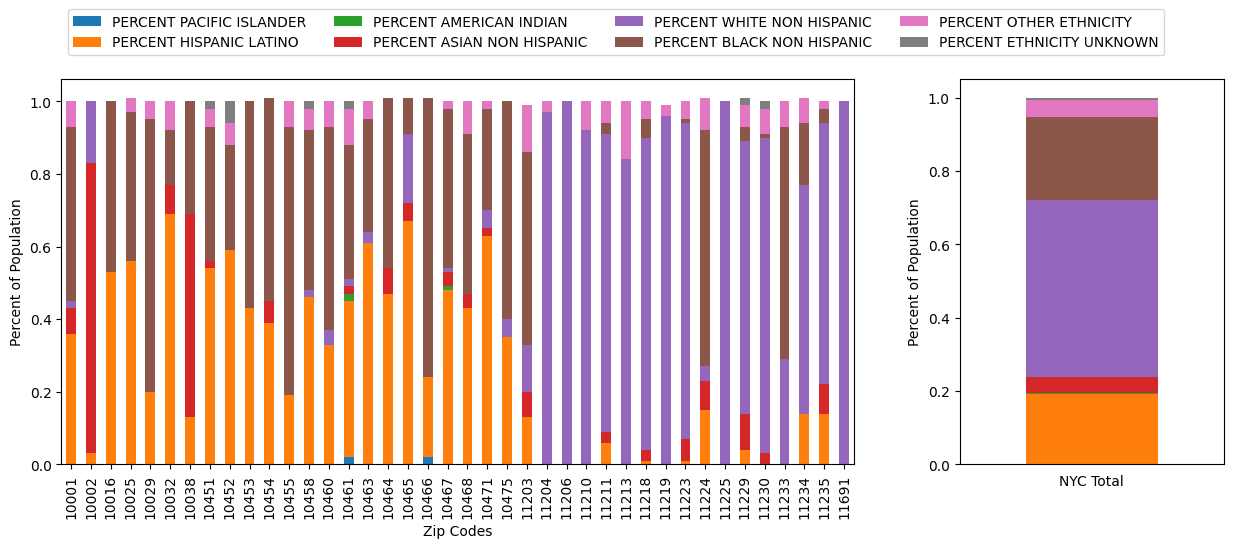

In [111]:
#display graphs for the ethnicity data
fig, ax = plt.subplots(1, 2, figsize=(15,5), gridspec_kw={'width_ratios': [3, 1]})

#First is a stacked bar chart showing the percents of each ethnicity for each area
# there are some percent totals over 100% due to survey error
eth_df[eth_df.columns.drop(get_cols(eth_df, ["COUNT", "TOTAL"]))].plot.bar(x="JURISDICTION NAME", stacked=True, 
                                        ax=ax[0], xlabel="Zip Codes", ylabel='Percent of Population')
#legen is the same for both graphs, so this puts it across the top
#ncol is number of columns
ax[0].legend(loc='upper center', ncol=4, bbox_to_anchor=(0.7,1.2))

#stacked bar chart for overall ethnicity for all people surveyed
eth_total_percent_df.plot.bar(xlabel='NYC Total', ylabel='Percent of Population', ax=ax[1], stacked=True, xticks=[], width=0.5,legend=False)


There is a good amount of variability in the data, with some some apparent clusters based on zip code. I'm wondering if I am able to predict an area of borugh a zip code might be in based on ethnicity.

I need to match each zip code to its borough name. First I find a website with all the zip codes matched to the borough it's in and scrape the table from it.

In [112]:
#Now I want to get all the borough names to match the zipcodes
zip_site = requests.get('https://www.nycbynatives.com/nyc_info/new_york_city_zip_codes.php').text
zip_soup = BeautifulSoup(zip_site, "html.parser")
zip_table_rows = zip_soup.find_all('tr')


Next I created a Data Frame that had each zip code matched with its borough. The table was not straightforward on the website so it took some manipulation.

In [113]:
zip_borough = pd.DataFrame(columns=["Zip", "BOROUGH"])
for row in zip_table_rows:
    col = row.find_all('td')
    #print(col[0])
    for i in [0,3]:
        #print(col[i])
        zipcode=col[i].text
        bor=col[i+1].text
        zip_borough = zip_borough.append({"Zip": zipcode.strip(), "BOROUGH": bor.strip()}, ignore_index=True)

In [114]:
zip_borough.head()

,Zip,BOROUGH
0,10001,Manhattan
1,10451,Bronx
2,10002,Manhattan
3,10452,Bronx
4,10003,Manhattan


Merging the borough Data Frame with the main ethnicity Data Frame to create a new one with all relevant information.

In [221]:
#adding the borough names to the overall ethnicity dataframe
#every row is duplicated so we just drop all the extras
eth_df_bor = eth_df.merge(right=zip_borough, left_on="JURISDICTION NAME", right_on="Zip", how='left').drop_duplicates().reset_index(drop=True)
eth_df_bor.drop("Zip", axis=1, inplace=True)
eth_df_bor.head()

,JURISDICTION NAME,COUNT PARTICIPANTS,COUNT PACIFIC ISLANDER,PERCENT PACIFIC ISLANDER,COUNT HISPANIC LATINO,PERCENT HISPANIC LATINO,COUNT AMERICAN INDIAN,PERCENT AMERICAN INDIAN,COUNT ASIAN NON HISPANIC,PERCENT ASIAN NON HISPANIC,COUNT WHITE NON HISPANIC,PERCENT WHITE NON HISPANIC,COUNT BLACK NON HISPANIC,PERCENT BLACK NON HISPANIC,COUNT OTHER ETHNICITY,PERCENT OTHER ETHNICITY,COUNT ETHNICITY UNKNOWN,PERCENT ETHNICITY UNKNOWN,BOROUGH
0,10001,44,0,0.0,16,0.36,0,0.0,3,0.07,1,0.02,21,0.48,3,0.07,0,0.0,Manhattan
1,10002,35,0,0.0,1,0.03,0,0.0,28,0.80,6,0.17,0,0.00,0,0.00,0,0.0,Manhattan
2,10016,17,0,0.0,9,0.53,0,0.0,0,0.00,0,0.00,8,0.47,0,0.00,0,0.0,Manhattan
3,10025,27,0,0.0,15,0.56,0,0.0,0,0.00,0,0.00,11,0.41,1,0.04,0,0.0,Manhattan
4,10029,20,0,0.0,4,0.20,0,0.0,0,0.00,0,0.00,15,0.75,1,0.05,0,0.0,Manhattan


Double checked for nulls to make sure all the zip codes were matched with their boroughs

In [223]:
eth_df_bor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   JURISDICTION NAME           40 non-null     object 
 1   COUNT PARTICIPANTS          40 non-null     int64  
 2   COUNT PACIFIC ISLANDER      40 non-null     int64  
 3   PERCENT PACIFIC ISLANDER    40 non-null     float64
 4   COUNT HISPANIC LATINO       40 non-null     int64  
 5   PERCENT HISPANIC LATINO     40 non-null     float64
 6   COUNT AMERICAN INDIAN       40 non-null     int64  
 7   PERCENT AMERICAN INDIAN     40 non-null     float64
 8   COUNT ASIAN NON HISPANIC    40 non-null     int64  
 9   PERCENT ASIAN NON HISPANIC  40 non-null     float64
 10  COUNT WHITE NON HISPANIC    40 non-null     int64  
 11  PERCENT WHITE NON HISPANIC  40 non-null     float64
 12  COUNT BLACK NON HISPANIC    40 non-null     int64  
 13  PERCENT BLACK NON HISPANIC  40 non-nu

Checking to see how much each borough is represented in the survey. No Staten Island to be seen.

In [224]:
#now want to look at the statistics for each borough
eth_bor_tot_sums = eth_df_bor.groupby("BOROUGH")["COUNT PARTICIPANTS"].sum()
eth_bor_tot_sums

BOROUGH
Bronx         655
Brooklyn     1175
Manhattan     172
Queens         37
Name: COUNT PARTICIPANTS, dtype: int64

In [225]:
eth_bor_count = eth_df_bor.groupby("BOROUGH")["BOROUGH"].count()
eth_bor_count

BOROUGH
Bronx        16
Brooklyn     16
Manhattan     7
Queens        1
Name: BOROUGH, dtype: int64

There is one zip code that represents Queens, and everyone surveyed answered as being White Non Hispanic. A google search tells me this is a far from accurate representation of the borough so I'll drop it and focus on the other three. This will not be a statistically significant study at all but I carried it out for practice purposes.

In [233]:
#we only have representation of one zip code of Queens (and none for Staten Island) so we'll drop it
eth_df_bor = eth_df_bor[eth_df_bor["BOROUGH"] != "Queens"]
eth_bor_count = eth_df_bor.groupby("BOROUGH")["BOROUGH"].count()
eth_bor_count

BOROUGH
Bronx        16
Brooklyn     16
Manhattan     7
Name: BOROUGH, dtype: int64

Now I want to make a bar chart of the overall ethnicity percentages of each borough, to see if there are any major differences tha makes it worth trying to predict. First I make the corresponding Data Frame.

In [235]:
eth_bor_count_cols = get_cols(eth_df_bor, ["COUNT", "BOROUGH"])
eth_bor_count_df = eth_df_bor[eth_bor_count_cols]
#eth_bor_count_df.head()

eth_bor_per = eth_bor_count_df.groupby("BOROUGH")[get_cols(eth_df, ["COUNT"])].sum()

In [237]:
#for every row in the df
for i, row in eth_bor_per.iterrows():
    #for every column that we are adding in (the percent columns)
    for num, col in enumerate(eth_percent_cols):
        #we are skipping the first column since it has the total number of participants, so we only look at column  number + 1
        #the value of that new column in each rowis the count value divided by the total number of participants for that borough
        eth_bor_per.loc[i, col] = eth_bor_per.loc[i][num+1] / eth_bor_per.loc[i, "COUNT PARTICIPANTS"]

#all the COUNT columns except for COUNT PARTICIPANTS
hold_cols=get_cols(eth_df_bor, ["COUNT"])[1:9]
eth_bor_per.drop(columns=hold_cols, inplace=True)
eth_bor_per.reset_index(inplace=True)
eth_bor_per

,BOROUGH,COUNT PARTICIPANTS,PERCENT PACIFIC ISLANDER,PERCENT HISPANIC LATINO,PERCENT AMERICAN INDIAN,PERCENT ASIAN NON HISPANIC,PERCENT WHITE NON HISPANIC,PERCENT BLACK NON HISPANIC,PERCENT OTHER ETHNICITY,PERCENT ETHNICITY UNKNOWN
0,Bronx,655,0.003053,0.450382,0.003053,0.019847,0.019847,0.454962,0.042748,0.006107
1,Brooklyn,1175,0.000000,0.033191,0.000000,0.030638,0.788936,0.085957,0.055319,0.005957
2,Manhattan,172,0.000000,0.325581,0.000000,0.238372,0.040698,0.360465,0.034884,0.000000


Graph for the ethnicity percentages of each borough.

<AxesSubplot:xlabel='Brooklyn + Bronx + Manhattan Total', ylabel='Percent of Population'>

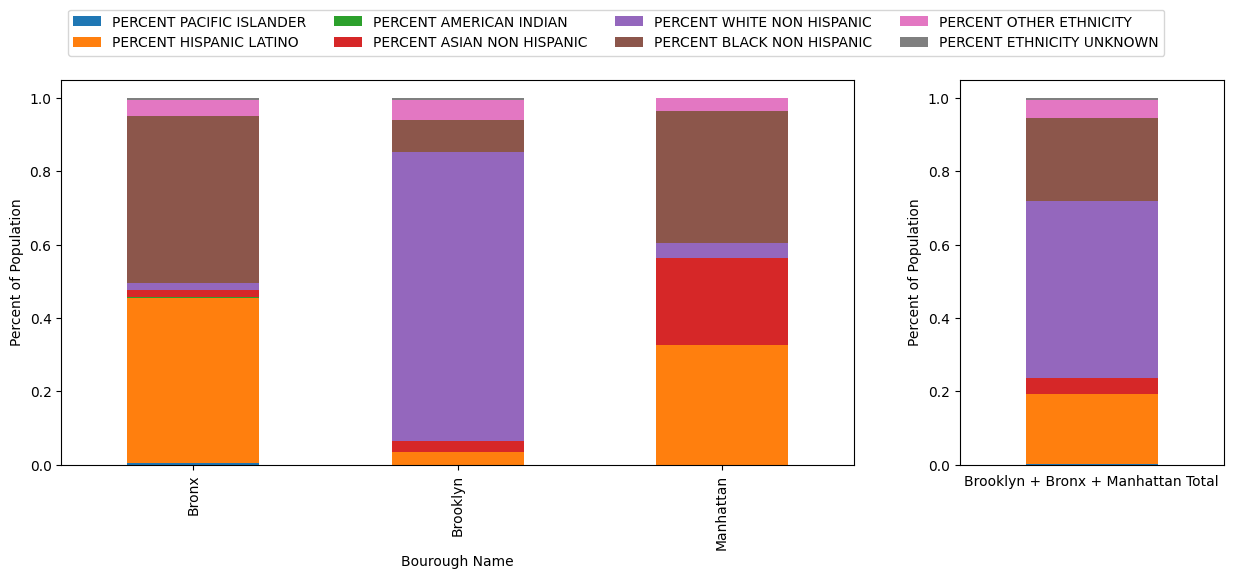

In [258]:
#graphing each borough 
#display graphs for the ethnicity data
fig, ax = plt.subplots(1, 2, figsize=(15,5), gridspec_kw={'width_ratios': [3, 1]})

#First is a stacked bar chart showing the percents of each ethnicity for each area
# there are some percent totals over 100% due to survey error
eth_bor_per[eth_bor_per.columns.drop("COUNT PARTICIPANTS")].plot.bar(x="BOROUGH", stacked=True, 
                                        ax=ax[0], xlabel="Bourough Name", ylabel='Percent of Population')
#legen is the same for both graphs, so this puts it across the top
#ncol is number of columns
ax[0].legend(loc='upper center', ncol=4, bbox_to_anchor=(0.7,1.2))

#stacked bar chart for overall ethnicity for all people surveyed
eth_total_percent_df.plot.bar(xlabel='Brooklyn + Bronx + Manhattan Total', ylabel='Percent of Population', ax=ax[1], stacked=True, xticks=[], width=0.5,legend=False)

A Google search tells us these percentages are not very accurate. Bronx would be the most accurate, with the Black community being overrepresented in Manhattan and underrepresented in Brooklyn, and Asian representation off in all of them. There is enough variability in them that we can practice a prediction algorithm with it.

In [ ]:
#pip install scikit-learn

In [262]:
eth_bor_per.drop("COUNT PARTICIPANTS", axis=1).corr()

,PERCENT PACIFIC ISLANDER,PERCENT HISPANIC LATINO,PERCENT AMERICAN INDIAN,PERCENT ASIAN NON HISPANIC,PERCENT WHITE NON HISPANIC,PERCENT BLACK NON HISPANIC,PERCENT OTHER ETHNICITY,PERCENT ETHNICITY UNKNOWN
PERCENT PACIFIC ISLANDER,1.000000,0.730668,1.000000,-0.537457,-0.520465,0.698043,-0.131815,0.518459
PERCENT HISPANIC LATINO,0.730668,1.000000,0.730668,0.183041,-0.963261,0.998913,-0.773089,-0.204986
PERCENT AMERICAN INDIAN,1.000000,0.730668,1.000000,-0.537457,-0.520465,0.698043,-0.131815,0.518459
PERCENT ASIAN NON HISPANIC,-0.537457,0.183041,-0.537457,1.000000,-0.440345,0.228675,-0.765088,-0.999750
PERCENT WHITE NON HISPANIC,-0.520465,-0.963261,-0.520465,-0.440345,1.000000,-0.974735,0.915037,0.460318
PERCENT BLACK NON HISPANIC,0.698043,0.998913,0.698043,0.228675,-0.974735,1.000000,-0.801820,-0.250394
PERCENT OTHER ETHNICITY,-0.131815,-0.773089,-0.131815,-0.765088,0.915037,-0.801820,1.000000,0.779300
PERCENT ETHNICITY UNKNOWN,0.518459,-0.204986,0.518459,-0.999750,0.460318,-0.250394,0.779300,1.000000


First I'll look at a Logistic Regression classifier.

In [239]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Hispanic, White, Black, and Asian will be the best indicators for classifying since they have prevalence in different amounts in all three boroughs.

In [253]:
#Hispanic, White, Black, and Asian look to be the best indicators for classifying boroughs since they are the most prevalant in each area
# and they show variability between boroughs
X = eth_df_bor[["PERCENT HISPANIC LATINO", "PERCENT WHITE NON HISPANIC", "PERCENT BLACK NON HISPANIC", "PERCENT ASIAN NON HISPANIC"]]
Y = eth_df_bor[["BOROUGH"]]
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=10)

In [254]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_hat = LR.predict(X_test)


C:\Users\Kerstin\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Looking at the classification report: The accuracy of the model is about 62%, so we put areas in the correct borough 62% of the time. That isn't great for a model. 

In [255]:
#Accuracy is percent of accurate predictions
#precision is ratio of true positives to true+false positives
#Recall is ability to predeict true positive results
#f1 is combo of above two metrics, should be close to 1
#support is number of occurences

from sklearn import metrics
print("CL Report: " ,metrics.classification_report(y_test, y_hat, zero_division=1))

CL Report:                precision    recall  f1-score   support

       Bronx       0.55      1.00      0.71         6
    Brooklyn       0.80      0.80      0.80         5
   Manhattan       1.00      0.00      0.00         5

    accuracy                           0.62        16
   macro avg       0.78      0.60      0.50        16
weighted avg       0.77      0.62      0.51        16



The R-squared value is also 0.625, which means 62.5% of the variability observed in the predictions is due to the model inputs. I think this speaks more to the quality of data as a whole.

In [252]:
print("R squared score: ", LR.score(X_test, y_test))

R squared score:  0.625


Now I am going to try a K Nearest Neighbor algorithm. I'll use the same train and test values to better compare the models.

In [264]:
from sklearn.neighbors import KNeighborsClassifier

K=3 yields the highest accuracy

In [282]:
k = 3
neighbors = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
y_hat_k = neighbors.predict(X_test)

C:\Users\Kerstin\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Looking at the classification report, there is a slightly higher accuracy, so it is better than the logical regression. It seems that for both models, Brooklyn is the easiest to predict based on the f1-score, maybe this data is best to build a model on whether a zip code is Brooklyn or not.

In [281]:
print("CL Report: " ,metrics.classification_report(y_test, y_hat_k, zero_division=1))

CL Report:                precision    recall  f1-score   support

       Bronx       0.55      1.00      0.71         6
    Brooklyn       0.80      0.80      0.80         5
   Manhattan       1.00      0.00      0.00         5

    accuracy                           0.62        16
   macro avg       0.78      0.60      0.50        16
weighted avg       0.77      0.62      0.51        16

